In [1]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Promijeni vidljivost <a href="javascript:code_toggle()">ovdje</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

In [2]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from ipywidgets import widgets
from ipywidgets import interact

## Loading problem

Kada se sustav predstavlja blok-dijagramom, glavna je ideja da ulazni signal utječe na izlazni signal. Izlaz se tada može koristiti kao ulaz za sljedeći blok. Implicitno se podrazumijeva da se, prilikom povezivanja novog bloka, ništa neće promijeniti u prethodnom bloku. To, međutim, nije istina. Navedeno se uobičajeno naziva »loading problem«. Za primjer, pogledajmo dva sustava prikazana u nastavku.

<table>
    <tr>
        <th style="text-align:center">Loading problem - shematski prikaz</th>
    </tr>
    <tr>
        <td style><img src='img/loading_problem_hr.png'></td>
    </tr>
    <tr>
    </tr>    
</table>

Sa stanovišta teorije upravljanja, svaki od prikazanih sustava može se analizirati zasebno i mogu se dobiti odgovarajuće prijenosne funkcije $P_1(s)$ i $P_2(s)$. Ako se blokovi povežu, mogli bismo pomisliti da je prijenosna funkcija kombiniranog sustava $P(s)$ jednaka $P_1(s) \cdot P_2(s)$, jer izlaz prvog sustava zapravo predstavlja ulaz za drugi sustav. Step-odziv za ovu prijenosnu funkciju prikazan je narančastom bojom na grafu (odziv "teorija upravljanja").

Ako, međutim, prikazani sustav analiziramo s aspekta elektrotehnike, na kraju ćemo dobiti drugačiju prijenosnu funkciju. Odgovarajući step-odziv prikazan je zelenom bojom na grafu (odziv "elektrotehnika"). Razlika između prikazanih odziva posljedica je loading problema.
Ako je ulazna impedancija drugog sustava mnogo veća od izlazne impedancije prvog sustava, razlika je zanemariva za sve praktične svrhe.

---

### Kako koristiti ovaj interaktivni primjer?
Pomičite klizače za promjenu vrijednosti $R_1$, $R_2$, $L_1$ i $L_2$ i promatrajte odzive "teorija upravljanja" i "elektrotehnika", zajedno s odgovarajućim prijenosnim funkcijama.

<IPython.core.display.Javascript object>


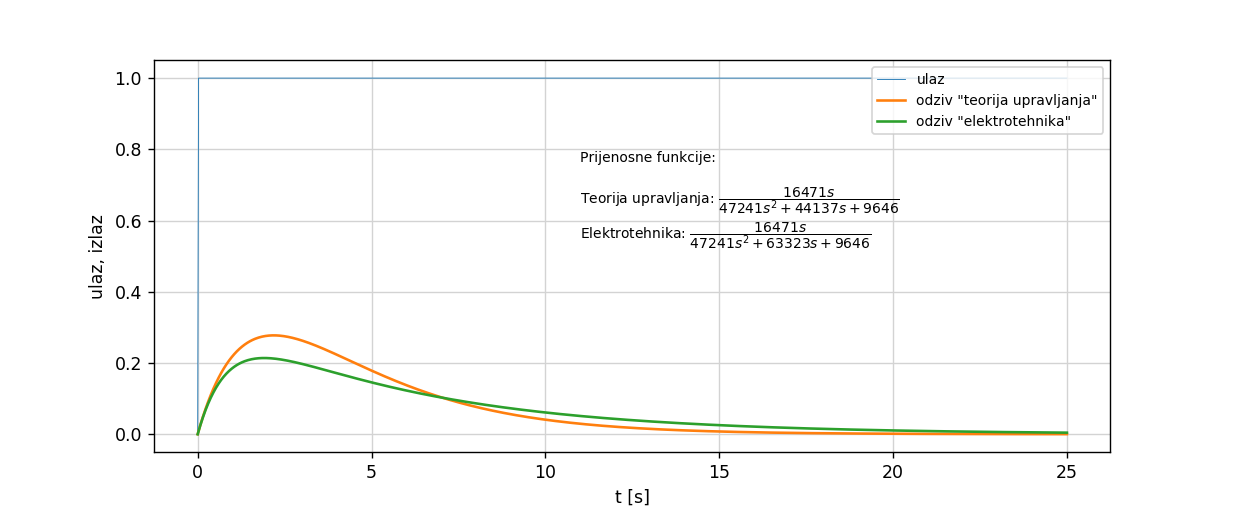

interactive(children=(IntSlider(value=10, description='$R_1$', max=300, min=1), IntSlider(value=10, descriptio…

In [3]:
num_of_samples = 100
total_time = 25
t = np.linspace(0, total_time, num_of_samples*10)# time for which response is calculated (start, stop, step)

# making step function (for plotting)
step_function = np.ones(len(t))
step_function[0]=0

# make figure
fig = plt.figure(figsize=(9.8, 3),num='Loading problem - vremenski odziv')

# add axes
ax = fig.add_subplot(111)
ax.set_xlabel('t [s]')
ax.set_ylabel('ulaz, izlaz')

ax.grid(which='both', axis='both', color='lightgray')


# plot step function and responses (initalisation)
ax.plot(t, step_function, lw=.5, label='ulaz')

resp1, = ax.plot([], [], lw=1.5, label='odziv "teorija upravljanja"')
resp2, = ax.plot([], [], lw=1.5, label='odziv "elektrotehnika"')
ax.legend(loc=1, fontsize=8)

R1=1
L1=1
R2=1
L2=1

eq = ax.text((-ax.get_xlim()[0]+ax.get_xlim()[1])*.4, (-ax.get_ylim()[0]+ax.get_ylim()[1])*.5, '',fontsize=8)
# eq.set_bbox(dict(facecolor='b', alpha=0.07, edgecolor='red'))

plt.show()

def set_input(R1=10, R2=20, L1=20, L2=4):
    # make transfer functions (with scipy)
    control_transfer = signal.TransferFunction([R2*L1, 0], [L1*L2, R2*L1+R1*L2, R1*R2])
    electro_transfer = signal.TransferFunction([R2*L1, 0], [L1*L2, R2*L1+R1*L1+R1*L2, R1*R2])
    # calculate step response (with scipy)
    time1, response1 = signal.step(control_transfer, T=t)
    time2, response2 = signal.step(electro_transfer, T=t)

    # update responses plots
    resp1.set_data(time1, response1)
    resp2.set_data(time2, response2)
    
    plt.show()
    
    #update strings for equations
    niz_gor_con = str(R2*L1) + 's'
    niz_dol_con = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L2) + 's + ' + str(R1*R2)
    niz_gor_ele = str(R2*L1) + 's'
    niz_dol_ele = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L1+R1*L2) + 's + ' + str(R1*R2)
    #update equations
    tekst = 'Prijenosne funkcije:\n\nTeorija upravljanja: $\dfrac{' + niz_gor_con + '}{' + niz_dol_con + '}$\nElektrotehnika: $\dfrac{' + niz_gor_ele + '}{' + niz_dol_ele + '}$'
    eq.set_text(tekst)

# make string to show equations
niz_gor_con = str(R2*L1) + 's'
niz_dol_con = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L2) + 's + ' + str(R1*R2)
niz_gor_ele = str(R2*L1) + 's'
niz_dol_ele = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L1+R1*L2) + 's + ' + str(R1*R2)

interact(set_input, R1=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$R_1$'),
         R2=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$R_2$'),
         L1=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$L_1$'),
         L2=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$L_2$'));
